In [1]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt


def molecular_energies(symbols, coordinates, basis_set):
    charge = 0
    multiplicity = 1
    # Generate the molecular Hamiltonian
    hamiltonian = qml.qchem.molecular_hamiltonian(
        symbols = symbols,
        coordinates = coordinates,
        basis=basis_set,
        charge=charge,
        mult=multiplicity
    )[0]

    # Obtain the matrix representation of the Hamiltonian
    ee = qml.eigvals(hamiltonian)
    return np.sort(ee)

# Molecula de $H^2$

## Un dimero

### SO: un dimero

In [2]:
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0.7, 0.0, 0.0, -0.7], requires_grad=True)
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
}

#Construccion de la clase
molecule = structure_molecular(symbols, coordinates, params)

In [3]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "interface": "autograd",
    "electrons": 2,
}

# Seteo de hiperparametros del circuito

molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )
molecule.set_state( ansatz_params["electrons"] )

a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)

In [4]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 200,
    "tol": 0.000001,
    "number": a*b,
    "theta":["generic", 0.35],
    "x":["generic", 0.5]}

optimizer = gradiend_optimizer(minimizate_params)
optimum = optimizer.OS(molecule.cost_function, coordinates, molecule.grad_x)

In [5]:
optimum[:6]

tensor([ 0.        ,  0.        ,  0.67296724,  0.        ,  0.        ,
        -0.67296724], requires_grad=True)

### VQE: un dimero

In [28]:
symbols = ["H", "H"]
coordinates = np.array([0, 0, 0.69435574, 0, 0, -0.69435574], requires_grad=True)
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf',
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [29]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "interface": "autograd",
    "electrons": 2,
}

# Seteo de hiperparametros del circuito

molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )
molecule.set_state( ansatz_params["electrons"] )

a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)

In [30]:
minimizate_params = {
    "type": "SLSQP",
    "maxiter": 30,
    "tol": 0.000001,
    "number": a*b,
    "theta":["generic", 0.35]}

optimizer = gradiend_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(molecule.cost_function)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


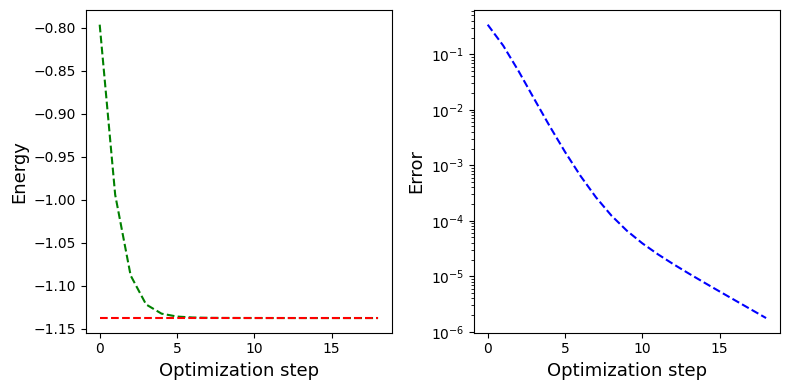

In [31]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

## Dos dimeros

In [2]:
symbols = ["H", "H", "H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [3]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "interface": "autograd",
    "electrons": 4,
}

# Seteo de hiperparametros del circuito

molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )
molecule.set_state( ansatz_params["electrons"] )
a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)

minimizate_params = {
        "type": "SLSQP",
        "maxiter": 30,
        "tol": 0.000001,
        "number": a*b,
        #"number": len(molecule.singles) + len(molecule.doubles),
        "theta": ["generic", 0.45]}

optimizer = gradiend_optimizer(minimizate_params)
energy, optimum = optimizer.VQE(molecule.cost_function)

KeyboardInterrupt: 

In [ ]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

In [36]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "interface": "autograd",
    "shots": 1000,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )
a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)


energies = []
thetas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
for t in thetas:
    minimizate_params = {
        "type": "SLSQP",
        "maxiter": 30,
        "tol": 0.000001,
        "number": a*b,
        "step_theta":t,
        "step_x":1}

    optimizer = gradiend_optimizer(minimizate_params)
    energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits, symbols)
    energies.append(energy)

[1 1 1 1 0 0 0 0]
Autograd ArrayBox with value -1.3924444415654729
Autograd ArrayBox with value -1.4579864164738963
Autograd ArrayBox with value -1.5179719850653473
Autograd ArrayBox with value -1.5723600835167464
Autograd ArrayBox with value -1.6212506165590477
Autograd ArrayBox with value -1.6648625677049196
Autograd ArrayBox with value -1.7035067126734522
Autograd ArrayBox with value -1.737556809117709
Autograd ArrayBox with value -1.7674224434142385
Autograd ArrayBox with value -1.7935256733881333
Autograd ArrayBox with value -1.8162825366037996
Autograd ArrayBox with value -1.8360896103592013
Autograd ArrayBox with value -1.8533152026663067
Autograd ArrayBox with value -1.8682944202937635
Autograd ArrayBox with value -1.8813272451381482
Autograd ArrayBox with value -1.8926787820984923
Autograd ArrayBox with value -1.9025809547452053
Autograd ArrayBox with value -1.9112350700403014
Autograd ArrayBox with value -1.91881481838046
Autograd ArrayBox with value -1.9254694031000388
Autog

In [49]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "pattern": "chain",
    "backend": None,
    "interface": "autograd",
    "shots": 1000,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )
a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)


energies_adam = []
thetas = [0.1, 0.2, 0.3, 0.4, 0.5]
for t in thetas:
    minimizate_params = {
        "type": "SLSQP",
        "maxiter": 30,
        "tol": 0.000001,
        "number": a*b,
        "step_theta":t,
        "step_x":1}

    optimizer = gradiend_optimizer(minimizate_params)
    optimizer.theta_optimizer = qml.AdamOptimizer(stepsize=t)

    energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits, symbols)
    energies_adam.append(energy)


[1 1 1 1 0 0 0 0]
Autograd ArrayBox with value -1.6283607339931156
Autograd ArrayBox with value -1.883577788886017
Autograd ArrayBox with value -1.932932120564207
Autograd ArrayBox with value -1.8995993739681878
Autograd ArrayBox with value -1.902316763600858
Autograd ArrayBox with value -1.9177759153085212
Autograd ArrayBox with value -1.924724438502451
Autograd ArrayBox with value -1.9304410800454823
Autograd ArrayBox with value -1.9393369644275995
Autograd ArrayBox with value -1.9465553795259827
Autograd ArrayBox with value -1.9514596668694961
Autograd ArrayBox with value -1.9594464837992223
Autograd ArrayBox with value -1.9684668227173787
Autograd ArrayBox with value -1.9711295549574774
Autograd ArrayBox with value -1.9659017195564312
Autograd ArrayBox with value -1.95995725586574
Autograd ArrayBox with value -1.9600341890213278
Autograd ArrayBox with value -1.9656275785297483
Autograd ArrayBox with value -1.9722914686033528
Autograd ArrayBox with value -1.976775003602243
Autograd 

### Comparacion theta

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


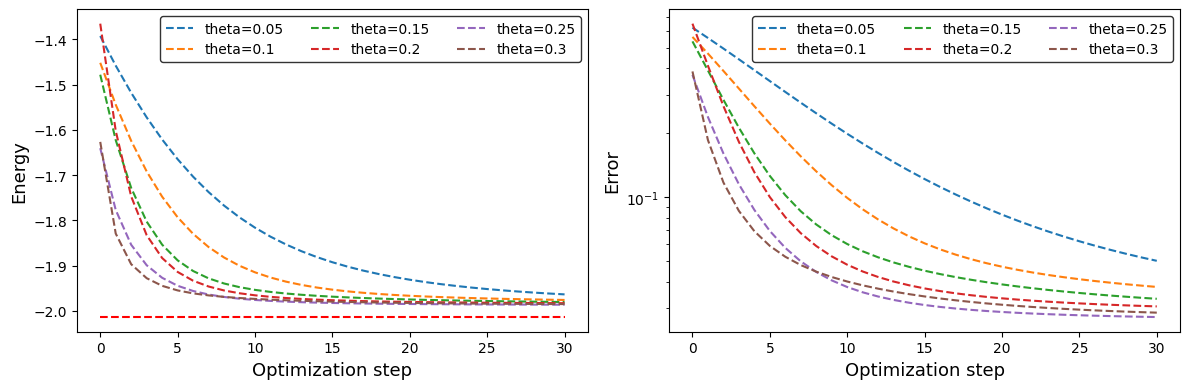

In [46]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])
aux_energy = energies[:6]

fig, ax = plt.subplots(1, 2, figsize=(12,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

for j,e in enumerate(aux_energy):
    ax[0].plot([i for i in range(len(e))], e, ls="dashed", label="theta="+str(thetas[j]))
#ax[0].plot([i for i in range(len(energy3))], energy3, "b", ls="dashed", label="Adam")

ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=3)

for j,e in enumerate(aux_energy):
    ax[1].plot([i for i in range(len(e))], [np.abs(e[i] -ee[0]) for i in range(len(e))], ls="dashed", label="theta="+str(thetas[j]))
ax[1].set_yscale("log")
ax[1].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=3)
fig.tight_layout()
plt.show()

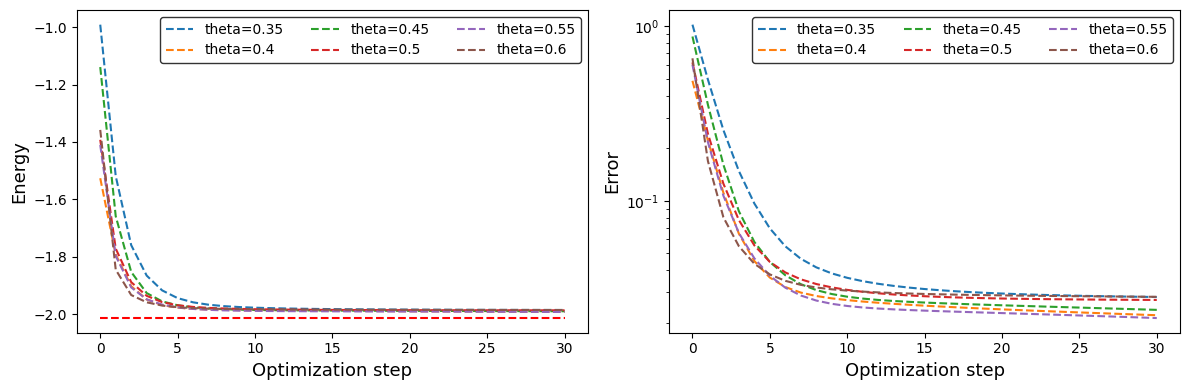

In [47]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])
aux_energy = energies[6:]

fig, ax = plt.subplots(1, 2, figsize=(12,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

for j,e in enumerate(aux_energy):
    ax[0].plot([i for i in range(len(e))], e, ls="dashed", label="theta="+str(thetas[j+6]))
#ax[0].plot([i for i in range(len(energy3))], energy3, "b", ls="dashed", label="Adam")

ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=3)

for j,e in enumerate(aux_energy):
    ax[1].plot([i for i in range(len(e))], [np.abs(e[i] -ee[0]) for i in range(len(e))], ls="dashed", label="theta="+str(thetas[j+6]))
ax[1].set_yscale("log")
ax[1].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=3)
fig.tight_layout()
plt.show()

### Comparacion Adam

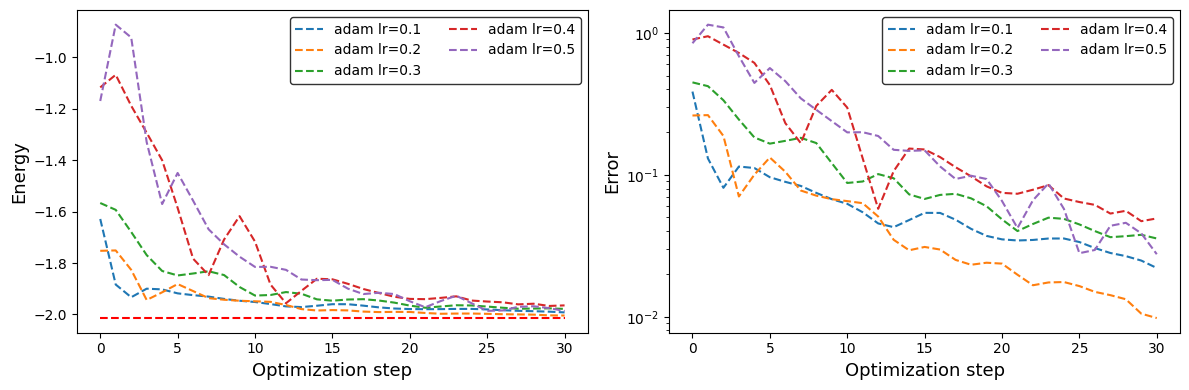

In [51]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])
aux_energy = energies_adam

fig, ax = plt.subplots(1, 2, figsize=(12,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

for j,e in enumerate(aux_energy):
    ax[0].plot([i for i in range(len(e))], e, ls="dashed", label="adam lr="+str(thetas[j]))

ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")
ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=2)

for j,e in enumerate(aux_energy):
    ax[1].plot([i for i in range(len(e))], [np.abs(e[i] -ee[0]) for i in range(len(e))], ls="dashed", label="adam lr="+str(thetas[j]))
ax[1].set_yscale("log")
ax[1].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=2)
fig.tight_layout()
plt.show()

## VQE: Tres dimeros

In [3]:
symbols = ["H", "H", "H", "H", "H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 
        0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614,
        0.0, 4.0, -0.6614, 0.0, 4.0, 0.6614], requires_grad=True)

#Parametros del hamiltoniano molecular
params = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule = vqe_molecular(symbols, coordinates, params)
molecule.set_group_characteristics()

In [3]:
ansatz_params = {
    "repetitions": 1,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 2**10,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=molecule.qubits, delta_sz=0)
print(a,b)

1 90


In [4]:
minimizate_params = {
    "maxiter": 15,
    "tol": 0.000001,
    "step_theta":0.35,
    "step_x":0.8,
    "number": a*b,}

# Ejecucion del optimizador para calcular los niveles 
# de energia

optimizer = gradiend_optimizer(minimizate_params)
#optimizer.set_constrains()

energy, optimum = optimizer.VQE(molecule.cost_function, molecule.qubits, symbols)

[1 1 1 1 1 1 0 0 0 0 0 0]


: 

: 

In [15]:
ee = molecular_energies(symbols=symbols, coordinates=coordinates, basis_set=params["basis"])

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)

fig.suptitle('Ground state of a spin chain', fontsize=12)

ax[0].plot([i for i in range(len(energy))], energy, "g", ls="dashed")
ax[0].plot([i for i in range(len(energy))], [ee[0] for i in range(len(energy))], "r", ls="dashed")

ax[1].plot([i for i in range(len(energy))], [np.abs(energy[i] -ee[0]) for i in range(len(energy))], "b", ls="dashed")
ax[1].set_yscale("log")
fig.tight_layout()
plt.show()

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


KeyboardInterrupt: 

## VQE: Cuatro dimeros

In [9]:
symbols4 = ["H", "H", "H", "H", "H", "H", "H", "H"]
coordinates4 = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614, 
        0.0, 1.0, -0.6614, 0.0, 1.0, 0.6614,
        0.0, 2.0, -0.6614, 0.0, 2.0, 0.6614,
        0.0, 3.0, -0.6614, 0.0, 3.0, 0.6614], requires_grad=True)


#Parametros del hamiltoniano molecular
params4 = {
    'mapping': "jordan_wigner",
    'charge': 0, 
    'mult': 1,
    'basis': 'sto-3g',
    'method': 'dhf'
}

#Construccion de la clase
molecule4 = vqe_molecular(symbols4, coordinates4, params4)
molecule4.set_group_characteristics()

In [11]:
ee = molecular_energies(symbols=symbols4, coordinates=coordinates4, basis_set=params4["basis"])

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


: 

: 

In [ ]:
ansatz_params = {
    "repetitions": 2,
    "base": "default.qubit",
    "backend": None,
    "interface": "autograd",
    "shots": 1000.0,
    "token": None,
}

# Seteo de hiperparametros del circuito
molecule.set_device( ansatz_params )
molecule.set_node( ansatz_params )

rep = molecule.qubits*ansatz_params["repetitions"]